In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os
import numpy as np
from pathlib import Path

import matplotlib as mpl

mpl.rcParams.update({"figure.facecolor": "white"})

In [13]:
home = str(Path.home())
load_dir = home + r'\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss'
df_dtime = pd.read_csv(load_dir + r'/eval_loss_dtimeTrue_Rho1.0E+06-1.0E+10_order5-21_shots1.00E+06_best_fit.csv')
df_pois = pd.read_csv(load_dir + r'/eval_loss_dtimeFalse_Rho1.0E+06-1.0E+10_order5-21_shots1.00E+06_best_fit.csv')

In [14]:
rho_lst = []
col_lst = []
for col in df_dtime:
    col_lst.append(col)
    rho_lst.append(col[3:])

rho_lst = np.array(rho_lst[2:]).astype(float)

In [17]:
t = df_dtime['time vector'].to_numpy()
t = np.linspace(t[0], t[-1], len(t))

In [18]:
rmse_dtime_lst = np.zeros(len(rho_lst))
rmse_pois_lst = np.zeros(len(rho_lst))
rrmse_dtime_lst = np.zeros(len(rho_lst))
rrmse_pois_lst = np.zeros(len(rho_lst))
true_rho_lst = []
fit_rate_seg_dtime_lst = []
fit_rate_seg_pois_lst = []
for i in range(len(rho_lst)):
    A = rho_lst[i]
    mu = 31.2e-9  # [s]
    sig = 500e-12  # [s]
    bg = 1e4  # [Hz]

    true_rho = A * np.exp(-1 * (t - mu) ** 2 / 2 / sig ** 2) + bg
    true_rho_lst.append(true_rho)
    
    fit_rate_seg_dtime = df_dtime[col_lst[i+2]]
    fit_rate_seg_pois = df_pois[col_lst[i+2]]
    fit_rate_seg_dtime_lst.append(fit_rate_seg_dtime)
    fit_rate_seg_pois_lst.append(fit_rate_seg_pois)
    
    rmse_dtime = np.sqrt(np.sum(((fit_rate_seg_dtime-true_rho))**2)/len(fit_rate_seg_dtime))
    rmse_dtime_lst[i] = rmse_dtime
    
    rrmse_dtime = np.sqrt(np.sum(((fit_rate_seg_dtime-true_rho)/true_rho)**2)/len(fit_rate_seg_dtime))
    rrmse_dtime_lst[i] = rrmse_dtime
    
    rmse_pois = np.sqrt(np.sum(((fit_rate_seg_pois-true_rho))**2)/len(fit_rate_seg_pois))
    rmse_pois_lst[i] = rmse_pois
    
    rrmse_pois = np.sqrt(np.sum(((fit_rate_seg_pois-true_rho)/true_rho)**2)/len(fit_rate_seg_pois))
    rrmse_pois_lst[i] = rrmse_pois



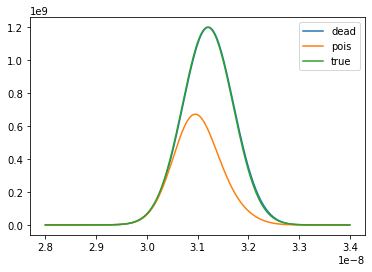

In [21]:
idx = 2

plt.plot(t, fit_rate_seg_dtime_lst[idx], label='dead')
plt.plot(t, fit_rate_seg_pois_lst[idx], label='pois')
plt.plot(t, true_rho_lst[idx], label='true')
plt.legend()
plt.show()

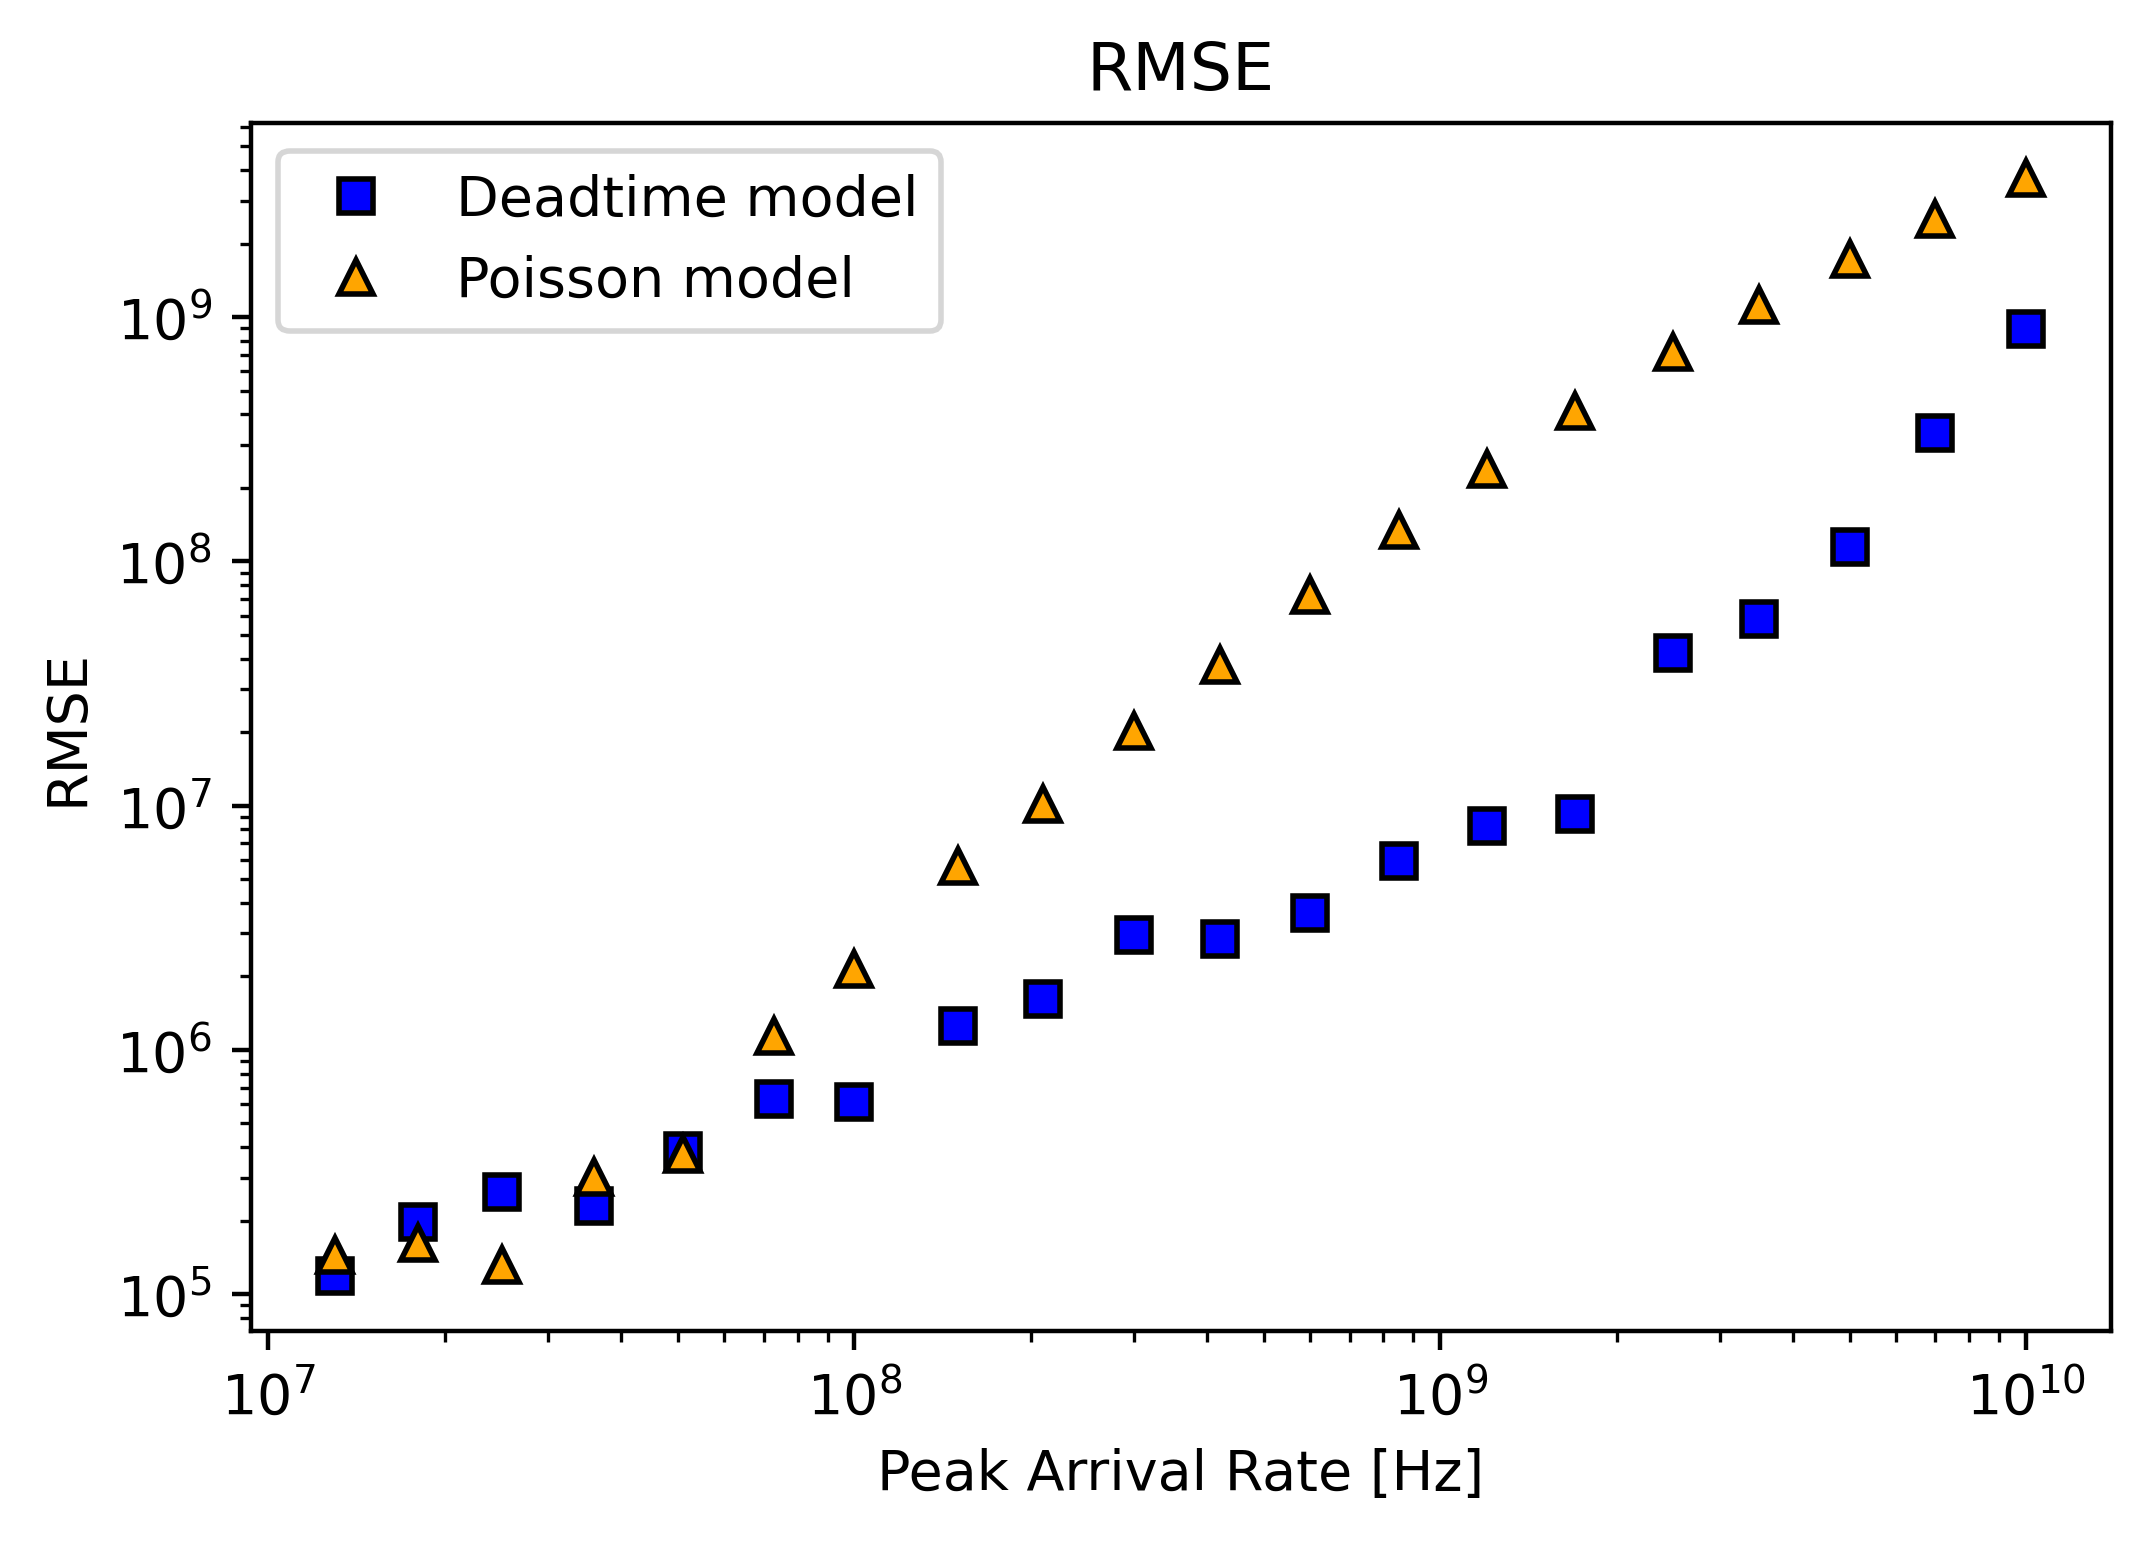

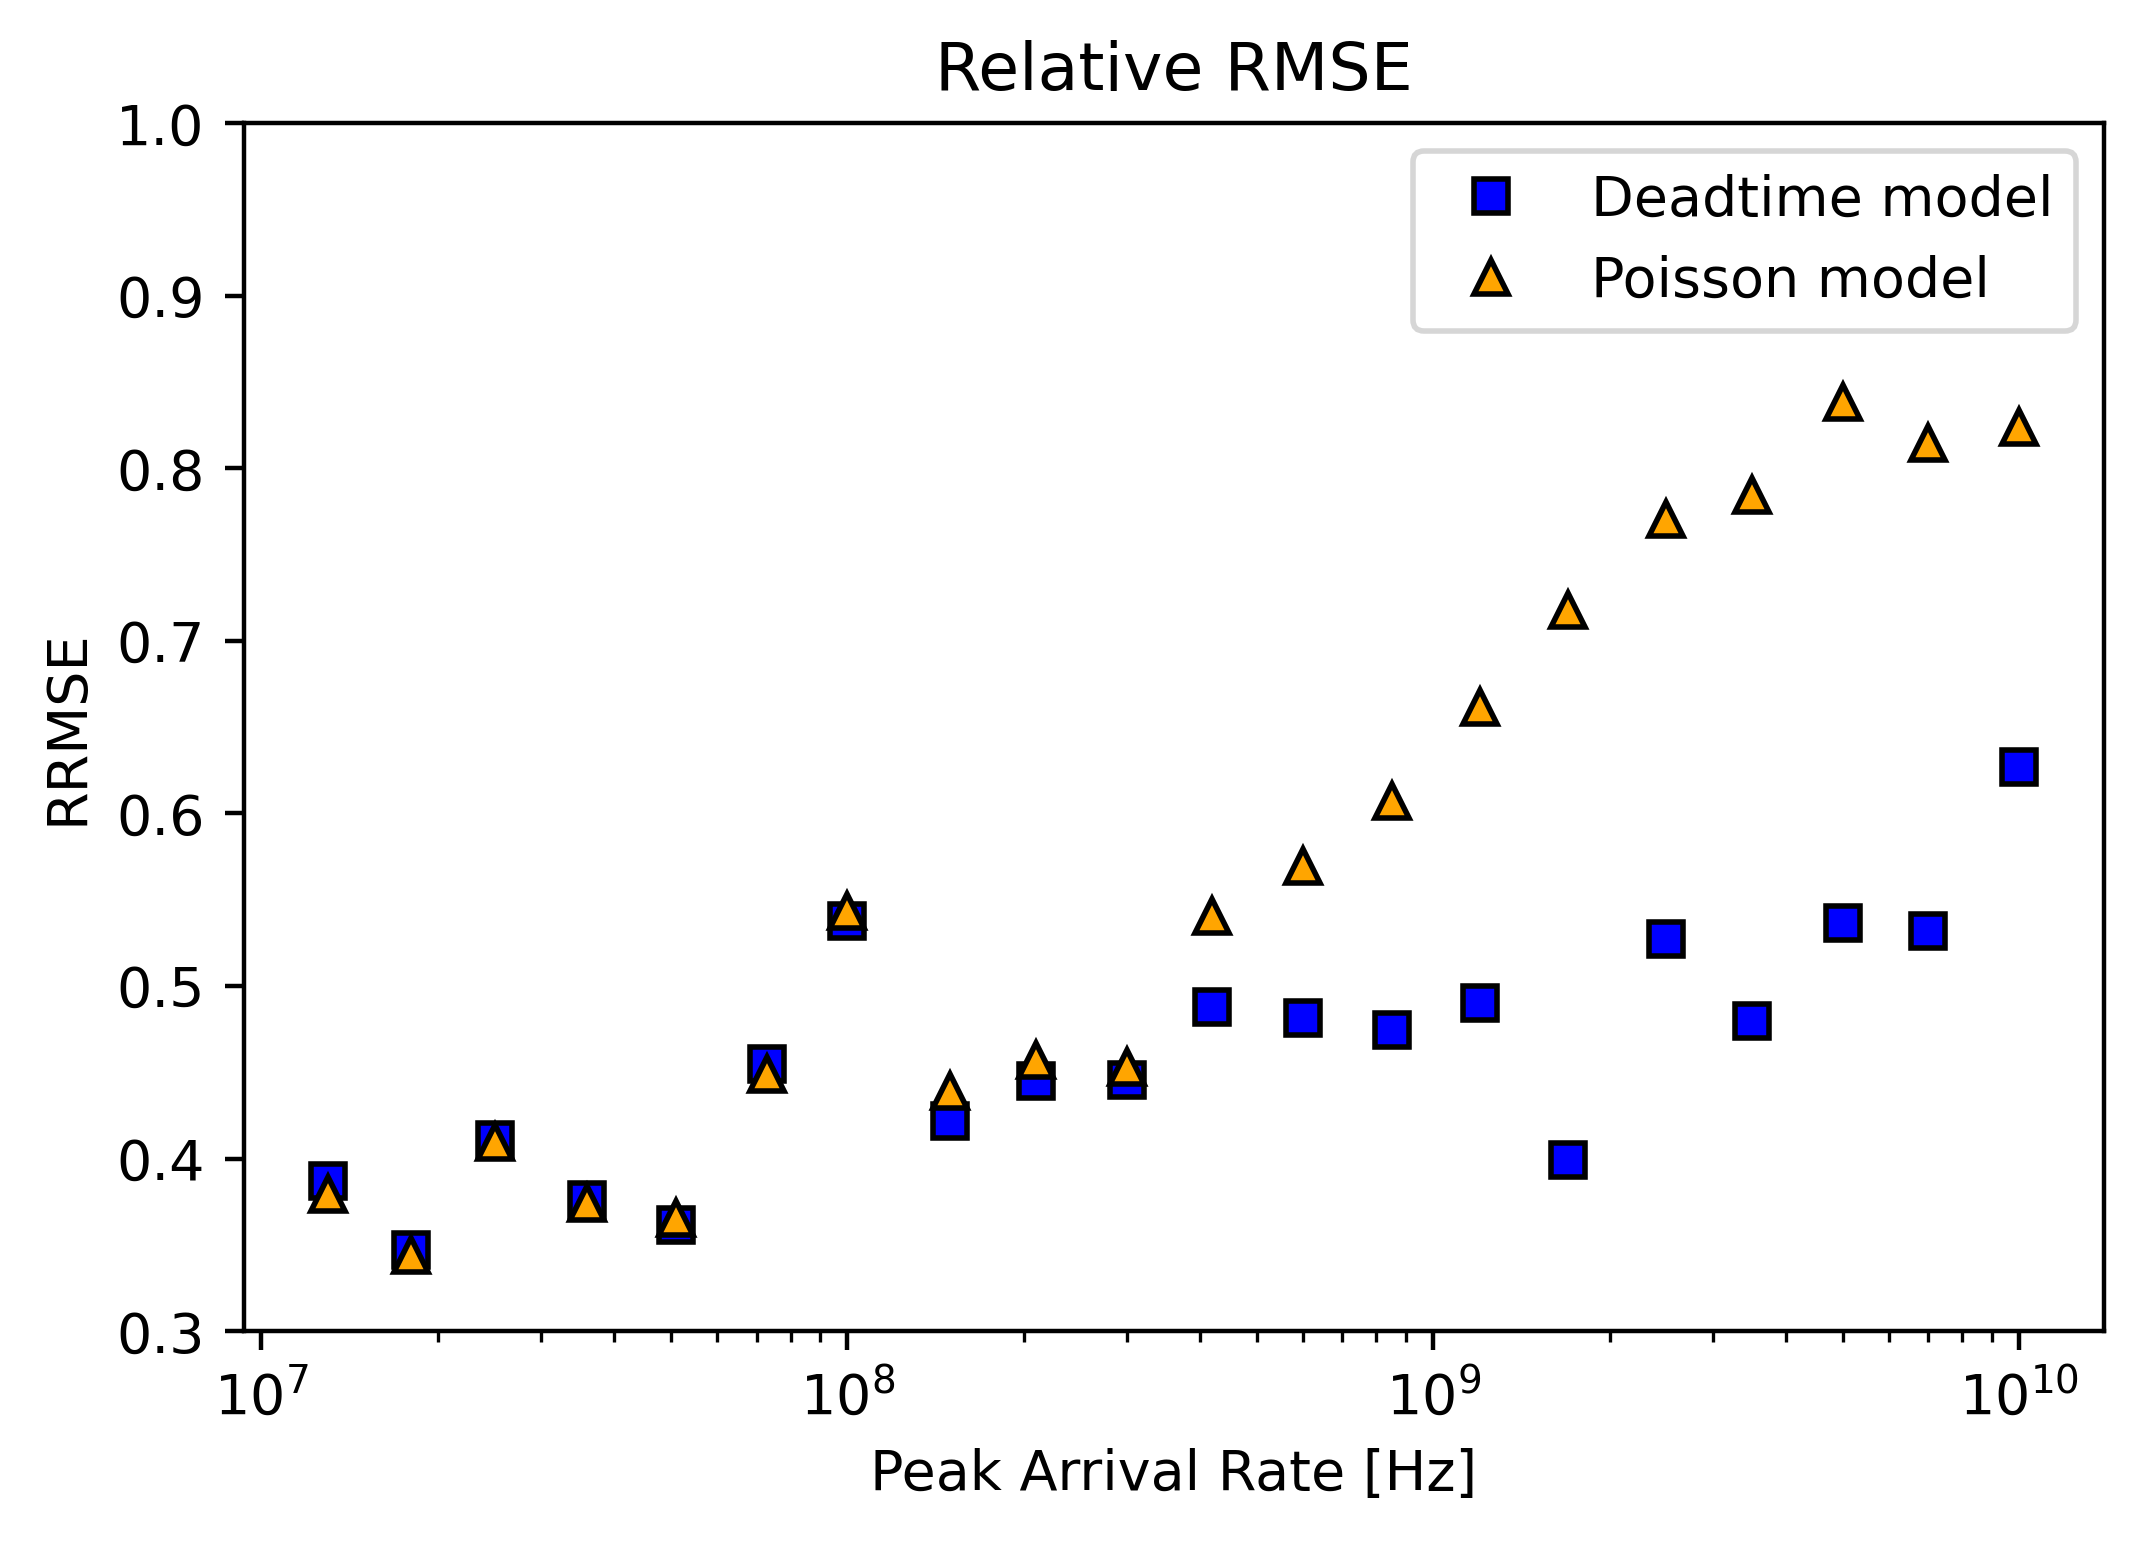

In [22]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.semilogx(rho_lst, rmse_dtime_lst, 's', color='blue', markeredgecolor='black', label='Deadtime model')
ax.semilogx(rho_lst, rmse_pois_lst, '^', color='orange', markeredgecolor='black', label='Poisson model')
ax.set_ylabel('RMSE')
ax.set_xlabel('Peak Arrival Rate [Hz]')
ax.set_title('RMSE')
plt.yscale('log')
plt.legend()
plt.show()

fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.semilogx(rho_lst, rrmse_dtime_lst, 's', color='blue', markeredgecolor='black', label='Deadtime model')
ax.semilogx(rho_lst, rrmse_pois_lst, '^', color='orange', markeredgecolor='black', label='Poisson model')
ax.set_ylabel('RRMSE')
ax.set_xlabel('Peak Arrival Rate [Hz]')
ax.set_title('Relative RMSE')
ax.set_ylim([0.3, 1.0])
plt.legend()
plt.show()